In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.misc as scm

This image is:  <class 'numpy.ndarray'> with dimensions (540, 960, 3)


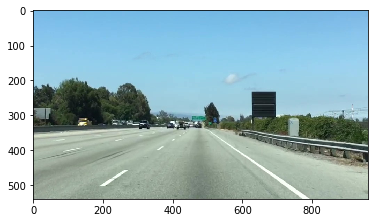

In [22]:
# Read in the image and print out some stats
image = mpimg.imread('../images/test.jpg')
print('This image is: ', type(image), 'with dimensions', image.shape)

# Grab the x and y size of the image
ysize = image.shape[0]
xsize = image.shape[1]


# Copying the image, not good to just use "="
raw = np.copy(image)
color_select = np.copy(image)
color_select_region = np.copy(image)

plt.imshow(image)
plt.show()

In [23]:
# Defining out colour selection criteria
red_threshold = 210
green_threshold = 210
blue_threshold = 210

rgb_threshold = [red_threshold, green_threshold, blue_threshold]


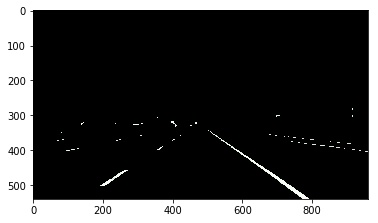

In [24]:
# I dentify pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                   (image[:,:,1] < rgb_threshold[1]) | \
                   (image[:,:,2] < rgb_threshold[2])
color_select[color_thresholds] = [0,0,0]

# Display the image
plt.imshow(color_select)
plt.show()


In [25]:
# Did this the first time to make the second picture
# scm.imsave('test2.jpg', color_select)

# Getting the new black and white image, printing some stats
imageBnW = mpimg.imread('../images/test2.jpg')
print('This image is: ', type(imageBnW), 'with dimensions:', imageBnW.shape)


This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


In [26]:
# Pulling out the x and Y sizes and making a copy of the image
xBnWsize = imageBnW.shape[0]
yBnWsize = imageBnW.shape[1]

region_select = np.copy(imageBnW)


In [27]:
# Defining a triangle region of interest
# The origin (x=0, y= 0) is in the upper left corner
# Syntax; variable = [x,y]
left_bottom = [0, 539]
right_bottom = [959, 539]
apex = [460, 320]


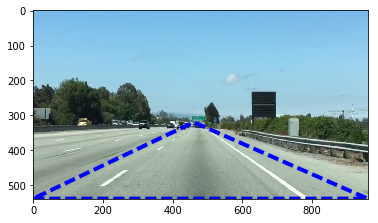

In [28]:
# Showing where our triangle of interest is
plt.imshow(raw)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x,y, 'b--', lw=4)
plt.show()

In [29]:
# Fitting lines (y=Ax+B) to identify the 3 sided region of interest
# np.polyfit(x,y,degree) returns the coefficients [A,B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)


In [30]:
# Making X and Y matrices from the grid
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

# XX is a matrix of all the x values (dimensions 540x540)
print(XX)
print('------------')
# YY is a matrix of all the y values (dimensions 960x960)
print(YY)

# Finding the region inside the lines
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
        
print(region_thresholds)
print('---------------')
print(color_thresholds)


[[  0   1   2 ..., 957 958 959]
 [  0   1   2 ..., 957 958 959]
 [  0   1   2 ..., 957 958 959]
 ..., 
 [  0   1   2 ..., 957 958 959]
 [  0   1   2 ..., 957 958 959]
 [  0   1   2 ..., 957 958 959]]
------------
[[  0   0   0 ...,   0   0   0]
 [  1   1   1 ...,   1   1   1]
 [  2   2   2 ...,   2   2   2]
 ..., 
 [537 537 537 ..., 537 537 537]
 [538 538 538 ..., 538 538 538]
 [539 539 539 ..., 539 539 539]]
[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]
---------------
[[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]


In [31]:
# Coloring pixels red which are inside the region of interest
region_select[region_thresholds] =  [255,0,0]


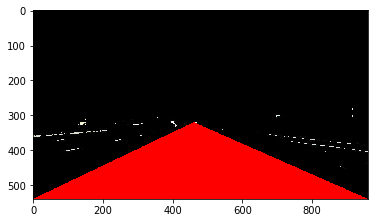

In [32]:
# Displaying the region of the image which we want to colour red
plt.imshow(region_select)
plt.show()


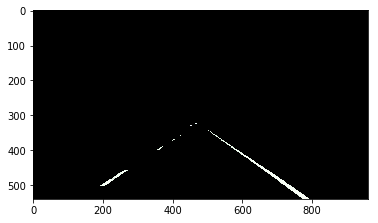

In [33]:
# Displaying only the white lines in the region we want
color_select_region[color_thresholds | ~region_thresholds] = [0,0,0]
plt.imshow(color_select_region)
plt.show()


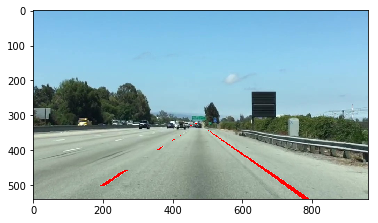

In [34]:
# Putting on the finiched lane lines on the raw image
raw[~color_thresholds & region_thresholds] = [255,0,0]
plt.imshow(raw)
plt.show()
